
--- Giai đoạn 1: Khởi tạo ---
  X0 = [1.0488135  2.21518937], f(X0) = 3.0487
  X1 = [1.10276338 2.04488318], f(X1) = 3.0126
  X2 = [0.9236548  2.14589411], f(X2) = 3.0271
  → Best ban đầu: [1.10276338 2.04488318] , f(best) = 3.0125748115775752
Iteration  1: global best f(x) = 3.010148, X_best = [1.09018675 2.04488318]
Iteration  2: global best f(x) = 3.008131, X_best = [1.04244094 2.07956215]
Iteration  3: global best f(x) = 3.007301, X_best = [1.03115975 2.07956215]
Iteration  4: global best f(x) = 3.002786, X_best = [1.03115975 2.04260442]
Iteration  5: global best f(x) = 3.000584, X_best = [1.02341178 2.00598188]
Iteration  6: global best f(x) = 3.000584, X_best = [1.02341178 2.00598188]
Iteration  7: global best f(x) = 3.000584, X_best = [1.02341178 2.00598188]
Iteration  8: global best f(x) = 3.000584, X_best = [1.02341178 2.00598188]
Iteration  9: global best f(x) = 3.000584, X_best = [1.02341178 2.00598188]
Iteration 10: global best f(x) = 3.000584, X_best = [1.02341178 2.00598

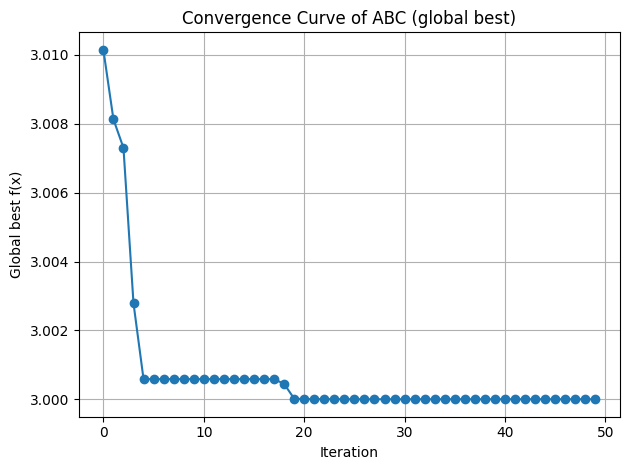

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# ============================
# BÀI TOÁN TỐI ƯU
# f(x1,x2) = (x1 - 1)^2 + (x2 - 2)^2 + 3
# 0.5 <= x1 <= 1.5, 1.5 <= x2 <= 2.5
# ============================

np.random.seed(0)   # cho kết quả lặp lại (có thể bỏ nếu không cần)

N = 6
D = 2
SN = N // 2
LIMIT = (N * D) // 2
MAX_ITER = 50

bounds = np.array([
    [0.5, 1.5],
    [1.5, 2.5]
])

# ============================
# HÀM MỤC TIÊU & FITNESS
# ============================

def objective(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2 + 3

def fitness_func(f):
    return 1/(1+f) if f >= 0 else 1 + abs(f)

# ============================
# KHỞI TẠO QUẦN THỂ
# ============================

food_sources = np.zeros((SN, D))
for i in range(SN):
    for j in range(D):
        min_j, max_j = bounds[j]
        food_sources[i, j] = min_j + np.random.rand() * (max_j - min_j)

trial = np.zeros(SN, dtype=int)
fitness = np.array([fitness_func(objective(x)) for x in food_sources])

best_index = np.argmax(fitness)
X_best = food_sources[best_index].copy()

# global best (best-so-far)
global_best_x = X_best.copy()
global_best_f = objective(global_best_x)

print("\n--- Giai đoạn 1: Khởi tạo ---")
for i, fs in enumerate(food_sources):
    print(f"  X{i} = {fs}, f(X{i}) = {objective(fs):.4f}")
print("  → Best ban đầu:", global_best_x, ", f(best) =", global_best_f)

# ============================
# HÀM SINH NGHIỆM MỚI
# ============================

def generate_new_solution(i):
    # chọn ngẫu nhiên 1 chiều
    k = np.random.randint(D)
    # chọn ngẫu nhiên 1 nguồn khác
    j = np.random.choice([a for a in range(SN) if a != i])
    # hệ số nhiễu
    phi = np.random.uniform(-1, 1)

    v = food_sources[i].copy()
    v[k] = v[k] + phi * (v[k] - food_sources[j][k])

    # giữ nghiệm trong miền
    return np.clip(v, bounds[:, 0], bounds[:, 1])


# ============================
# VÒNG LẶP ABC
# ============================

history = []   # lưu global_best_f mỗi vòng để vẽ đồ thị

start = time.time()

for iteration in range(1, MAX_ITER + 1):

    # --- Employed bees ---
    for i in range(SN):
        v = generate_new_solution(i)
        f_new = objective(v)
        f_old = objective(food_sources[i])
        fit_new = fitness_func(f_new)
        fit_old = fitness_func(f_old)

        if fit_new > fit_old:
            food_sources[i] = v
            fitness[i] = fit_new
            trial[i] = 0
        else:
            trial[i] += 1

    # --- Onlooker bees ---
    prob = fitness / np.sum(fitness)
    for _ in range(SN):
        i = np.random.choice(range(SN), p=prob)
        v = generate_new_solution(i)

        f_new = objective(v)
        f_old = objective(food_sources[i])
        fit_new = fitness_func(f_new)
        fit_old = fitness_func(f_old)

        if fit_new > fit_old:
            food_sources[i] = v
            fitness[i] = fit_new
            trial[i] = 0
        else:
            trial[i] += 1

    # --- Scout bees ---
    for i in range(SN):
        if trial[i] > LIMIT:
            for j in range(D):
                min_j, max_j = bounds[j]
                food_sources[i][j] = min_j + np.random.rand() * (max_j - min_j)
            trial[i] = 0
            fitness[i] = fitness_func(objective(food_sources[i]))

    # --- Cập nhật GLOBAL BEST ---
    best_index = np.argmax(fitness)
    current_best_x = food_sources[best_index].copy()
    current_best_f = objective(current_best_x)

    if current_best_f < global_best_f:
        global_best_f = current_best_f
        global_best_x = current_best_x.copy()

    history.append(global_best_f)

    print(f"Iteration {iteration:2d}: global best f(x) = {global_best_f:.6f}, X_best = {global_best_x}")

end = time.time()

print("\n=== KẾT QUẢ CUỐI CÙNG (ABC) ===")
print("X_best ≈", global_best_x)
print("f(X_best) ≈", global_best_f)
print(f"Thời gian chạy ABC: {end - start:.6f} giây")

# ============================
# VẼ ĐỒ THỊ HỘI TỤ
# ============================

plt.plot(history, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Global best f(x)")
plt.title("Convergence Curve of ABC (global best)")
plt.grid(True)
plt.tight_layout()
plt.show()
